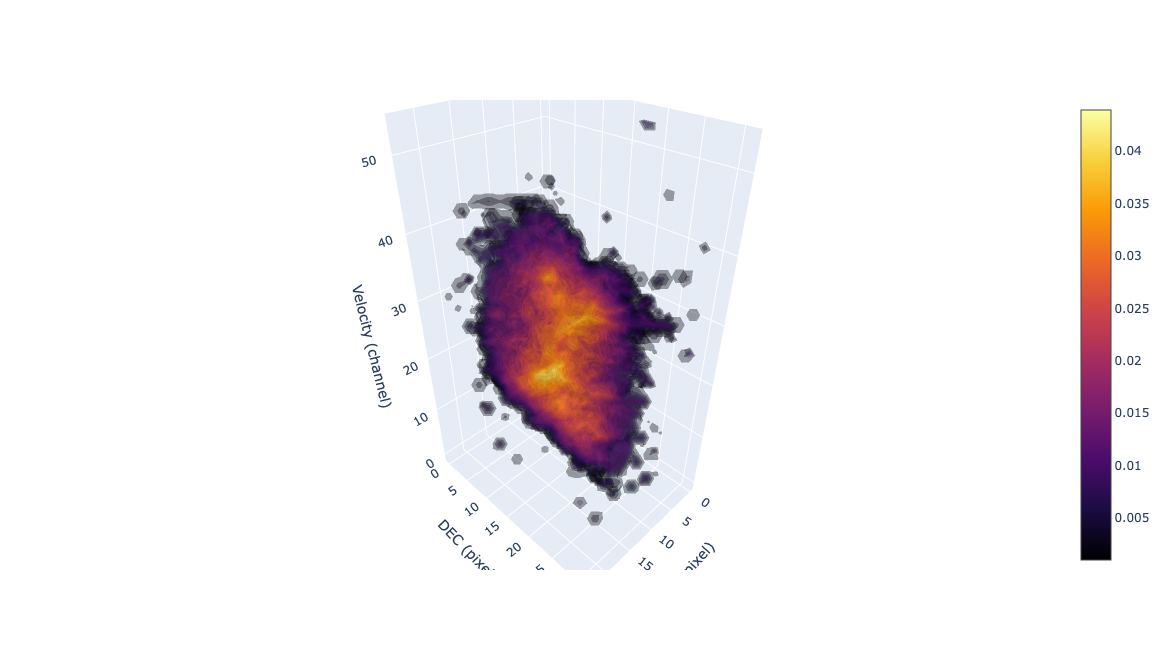

In [16]:
from spectral_cube import SpectralCube
import numpy as np
import astropy.units as u
import plotly.graph_objects as go
from scipy.ndimage import zoom

# -------------------------------------------------
# 1. Leer cubo
# -------------------------------------------------
path = '/Users/mac/Tesis/IRAS15445_recortados/I15445.mstransform_cube_contsub_13CO.fits'
cube = SpectralCube.read(path)

cube_cut = cube[90:225, 220:300, 225:285]
cube_include = cube_cut.with_mask(cube_cut > 0.011 * u.Jy / u.beam)

data = cube_include.filled_data[:].value
data = np.nan_to_num(data, nan=0.0)

# -------------------------------------------------
# 2. Submuestreo (CRUCIAL)
# -------------------------------------------------
# reduce resolución espacial y espectral
data_ds = zoom(data, zoom=(0.4, 0.4, 0.4), order=1)

level = 0.001
vmax = data_ds.max()

# -------------------------------------------------
# 3. Grid reducido
# -------------------------------------------------
nz, ny, nx = data_ds.shape
z, y, x = np.mgrid[0:nz, 0:ny, 0:nx]

# -------------------------------------------------
# 4. Volume rendering
# -------------------------------------------------
fig = go.Figure(
    data=go.Volume(
        x=x.flatten(),
        y=y.flatten(),
        z=z.flatten(),
        value=data_ds.flatten(),
        isomin=level,
        isomax=vmax,
        opacity=0.2,
        surface_count=20,
        colorscale='Inferno'
    )
)

fig.update_layout(
    scene=dict(
        xaxis_title='RA (pixel)',
        yaxis_title='DEC (pixel)',
        zaxis_title='Velocity (channel)'
    ),
    width=850,
    height=650
)

fig.show()


